# Despicable Me

### Load and standardize data

In [25]:
import pandas as pd
import numpy as np

proc_folder = '/Users/catcamacho/Box/CCP/HBN_study/HBN_video_coding/processing/'

from emocodes import extract_audio_features
tp_audio = extract_audio_features('/Users/catcamacho/Box/CCP/HBN_study/HBN_video_coding/Videos/The_Present_0321.mp4', 10)
t = tp_audio['onset_ms']
tind = np.arange(0,203200,800)/1000
tp_audio.index = pd.to_datetime(t,unit='ms')
tp_audio = tp_audio.resample('800ms').mean()
tp_audio.index = np.arange(0,len(tp_audio),1)
tp_audio['seconds'] = tind
tp_audio.index.name=None
tp_audio.to_csv(proc_folder + 'low_level/movieTP_audio_features_resampled_20211001.csv')

In [18]:
from emocodes import extract_audio_features
dm_audio = extract_audio_features('/Users/catcamacho/Box/CCP/HBN_study/HBN_video_coding/Videos/Despicable_Me_1000.mp4', 10)
t = dm_audio['onset_ms']
tind = np.arange(0,600000,800)/1000
dm_audio.index = pd.to_datetime(t,unit='ms')
dm_audio = dm_audio.resample('800ms').mean()
dm_audio.index = np.arange(0,len(dm_audio),1)
dm_audio['seconds'] = tind
dm_audio.index.name=None
dm_audio.to_csv(proc_folder + 'low_level/movieDM_audio_features_resampled_20211001.csv')

### Load data

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set(context='talk', style='white')

proc_folder = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/'
analysis_folder = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/analysis/'
figure_folder = analysis_folder + 'figures/'

# list the features of interest for pair-wise comparison
feat_orig = ['char_pos_int', 'char_neg_int', 'char_anger_int','char_happy_int','char_fear_int', 
            'char_excite_int','char_sad_int','has_body', 'has_faces', 'num_chars','speaking', 
            'whole_words','brightness', 'frac_high_saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'rms']

features = ['positive', 'negative', 'anger','happy','fear', 'excite','sad',
            'body', 'face', 'number_characters','spoken_words', 'written_words',
            'brightness', 'saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'loudness']

# load data and rescale each entry
mm = MinMaxScaler(feature_range=(0,1))

dm_vidfeatures = pd.read_csv(proc_folder + 'summary/DM_summary_codes.csv', index_col=0)
dm_vidfeatstd = pd.DataFrame(mm.fit_transform(dm_vidfeatures[feat_orig]), columns=features, index=dm_vidfeatures.index)
dm_vidfeatstd.head()

,positive,negative,anger,happy,fear,excite,sad,body,face,number_characters,spoken_words,written_words,brightness,saliency,sharpness,vibrance,optical_flow,dynamic_tempo,loudness
seconds,,,,,,,,,,,,,,,,,,,
0.0,0.842105,0.000000,0.000000,0.0,0.000000,0.592593,0.0,1.0,1.0,0.8,0.0,0.0,0.195023,0.318298,1.0,0.130664,0.076346,0.684137,0.295850
0.8,0.842105,0.081081,0.000000,0.0,0.000000,0.648148,0.0,1.0,1.0,0.8,0.0,0.0,0.190649,0.467226,1.0,0.130670,0.041103,0.300215,0.323402
1.6,0.821053,0.141892,0.009009,0.0,0.022222,0.546296,0.0,1.0,1.0,0.8,0.0,0.0,0.194516,0.465190,1.0,0.132272,0.123295,0.317244,0.410008
2.4,0.684211,0.175676,0.108108,0.0,0.000000,0.372222,0.0,1.0,1.0,0.8,1.0,0.0,0.211446,0.455586,1.0,0.128677,0.045180,0.627059,0.393347
3.2,0.684211,0.189189,0.139640,0.0,0.000000,0.364815,0.0,1.0,1.0,0.8,1.0,0.0,0.220833,0.467330,1.0,0.134201,0.156291,0.472623,0.345596


In [23]:
pcentnonzero = pd.DataFrame()
for a in features:
    t = (dm_vidfeatstd[a]>0).astype(int)
    pcentnonzero.loc[a,'percent'] = (sum(t)/len(dm_vidfeatstd))*100
pcentnonzero.to_csv('DMpcents.csv')

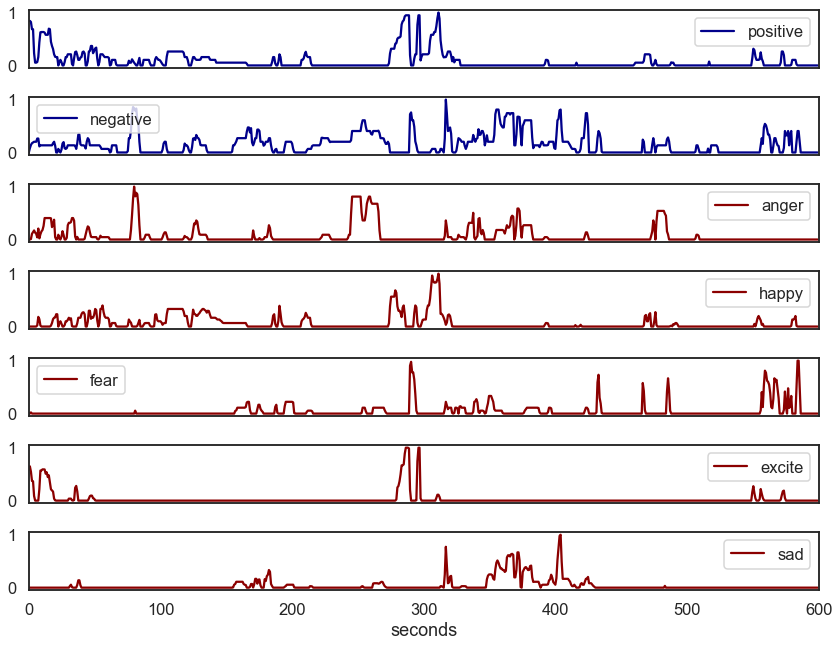

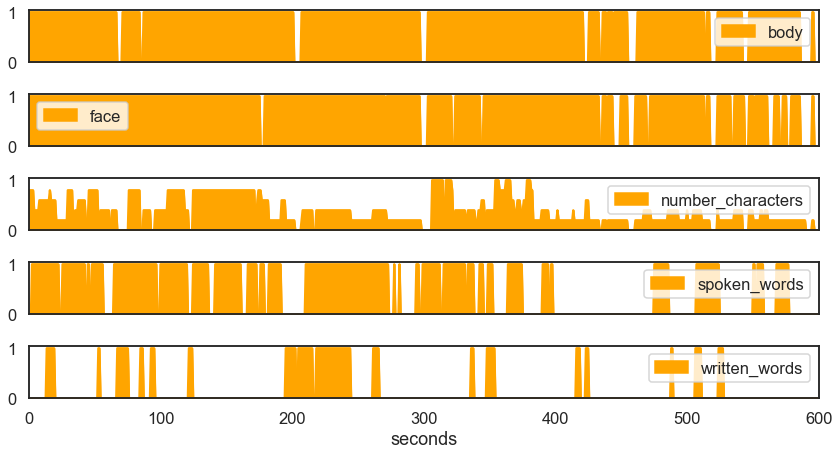

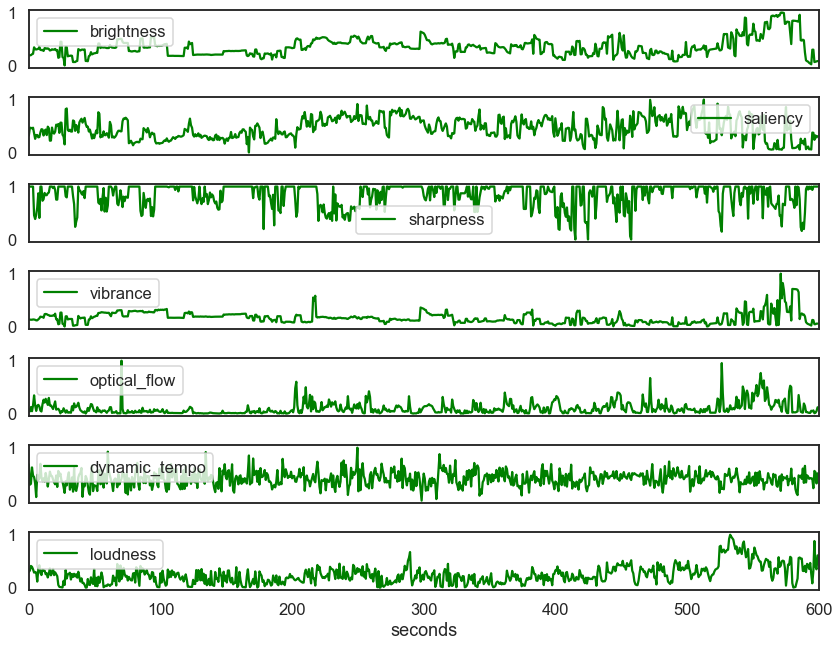

In [9]:
dm_vidfeatstd[['positive', 'negative', 'anger','happy','fear', 'excite','sad']].plot(kind='line',figsize=(12,8/6*7),subplots=True, xlim=(0,600), 
                                                      color=['darkblue','darkblue','darkred','darkred','darkred','darkred','darkred'])
plt.tight_layout()
plt.savefig(figure_folder + 'DM_valencecodes.svg')
plt.show()
plt.close()
dm_vidfeatstd[['body', 'face', 'number_characters','spoken_words', 'written_words']].plot(kind='area',
                                                      figsize=(12,8/6*5),subplots=True, xlim=(0,600), 
                                                      color='orange')
plt.tight_layout()
plt.savefig(figure_folder + 'DM_objectivecodes.svg')
plt.show()
plt.close()
dm_vidfeatstd[['brightness', 'saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'loudness']].plot(kind='line',
                                                      figsize=(12,8/6*7),subplots=True, xlim=(0,600), 
                                                      color='green')
plt.tight_layout()
plt.savefig(figure_folder + 'DM_automaticcodes.svg')
plt.show()
plt.close()

### Compute Pairwise Mean Instantaneous Phase Synchrony

In [10]:
from scipy.signal import hilbert
import itertools
from sklearn.metrics import explained_variance_score
from pliers.diagnostics import variance_inflation_factors

mean_ips = pd.DataFrame(1, columns=features, index=features)
varexp = pd.DataFrame(1, columns=features, index=features)
corr = pd.DataFrame(1, columns=features, index=features)

# get unique pairs of feature labels
combs = itertools.combinations(features,2)
for pair in combs:
    a = pair[0]
    b = pair[1]
    
    # compute phase angles
    aphase = np.angle(hilbert(dm_vidfeatstd[a]),deg=False)
    bphase = np.angle(hilbert(dm_vidfeatstd[b]),deg=False)
    # compute phase synchrony
    phase_synchrony = 1-np.sin(np.abs(aphase-bphase)/2)
    
    # plot the signals and their phase synchrony
    fig, ax = plt.subplots(3,1,figsize=(12,9))
    plt.setp(ax,xlim=(0,600),xlabel='Time (seconds)')
    ax[0].plot(dm_vidfeatstd.index, dm_vidfeatstd[a], dm_vidfeatstd.index, dm_vidfeatstd[b])
    ax[0].set_title('{0} (blue) and {1} (orange) Signals'.format(a,b), weight='bold')
    ax[1].plot(dm_vidfeatstd.index, aphase, dm_vidfeatstd.index, bphase)
    ax[1].set_title('{0} (blue) and {1} (orange) Phase Angles'.format(a,b), weight='bold')
    ax[2].plot(dm_vidfeatstd.index, phase_synchrony)
    ax[2].set_title('Instantaneous Phase Synchrony', weight='bold')
    plt.tight_layout()
    #plt.savefig(figure_folder + 'DM_{0}_{1}_ips.svg'.format(a,b))
    plt.close()
    
    # add mean IPS and variance scores to the dataframes
    mean_ips.loc[a, b] = phase_synchrony.mean()
    mean_ips.loc[b, a] = phase_synchrony.mean()
    varexp.loc[a, b] = explained_variance_score(dm_vidfeatstd[a], dm_vidfeatstd[b])
    varexp.loc[b, a] = explained_variance_score(dm_vidfeatstd[b], dm_vidfeatstd[a])
    corr.loc[a, b] = np.corrcoef(dm_vidfeatstd[a], dm_vidfeatstd[b])[1,0]
    corr.loc[b, a] = np.corrcoef(dm_vidfeatstd[a], dm_vidfeatstd[b])[1,0]

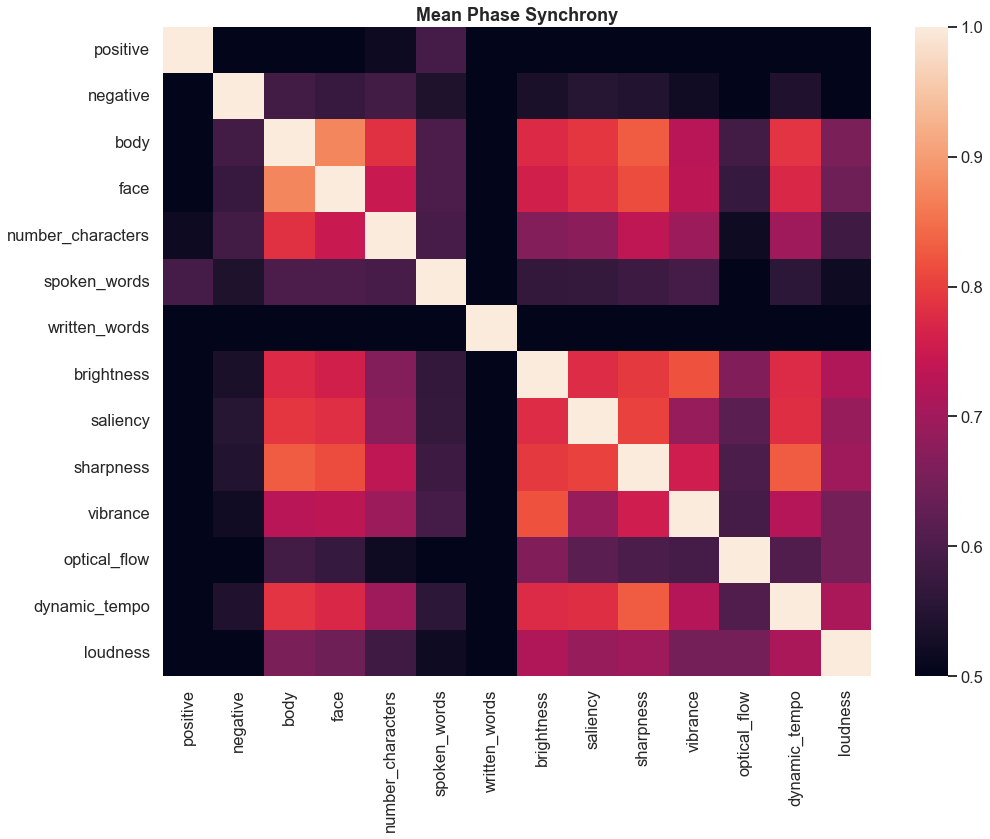

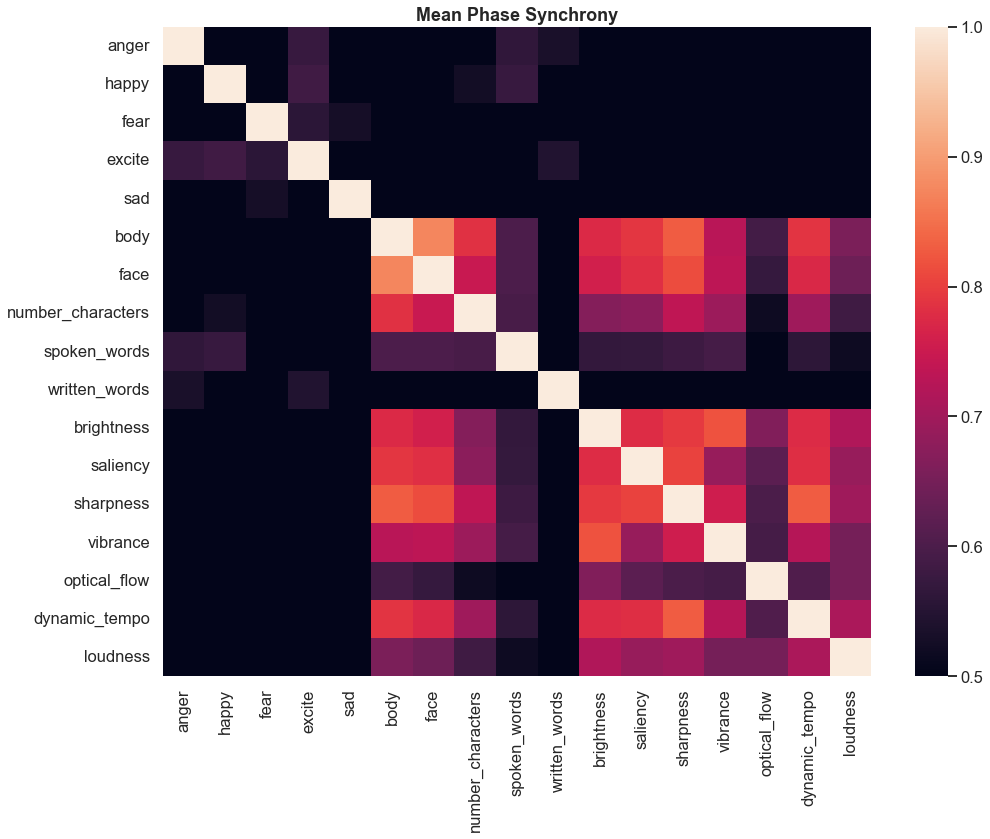

In [17]:
# plot and save the mean ISP
mean_ips.to_csv(proc_folder + 'summary/DM_mean_ips.csv')
general_features =['positive', 'negative', 'body', 'face', 'number_characters','spoken_words', 'written_words',
            'brightness', 'saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'loudness']

specific_features = ['anger','happy','fear', 'excite','sad',
            'body', 'face', 'number_characters','spoken_words', 'written_words',
            'brightness', 'saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'loudness']

plt.figure(figsize=(15,12))
sns.heatmap(mean_ips.loc[general_features,general_features], vmin=0.5)
plt.title('Mean Phase Synchrony', weight='bold')
plt.tight_layout()
plt.savefig(figure_folder + 'DM_mean_ips_general.svg')
plt.show()
plt.close()

plt.figure(figsize=(15,12))
sns.heatmap(mean_ips.loc[specific_features,specific_features], vmin=0.5)
plt.title('Mean Phase Synchrony', weight='bold')
plt.tight_layout()
plt.savefig(figure_folder + 'DM_mean_ips_specific.svg')
plt.show()
plt.close()

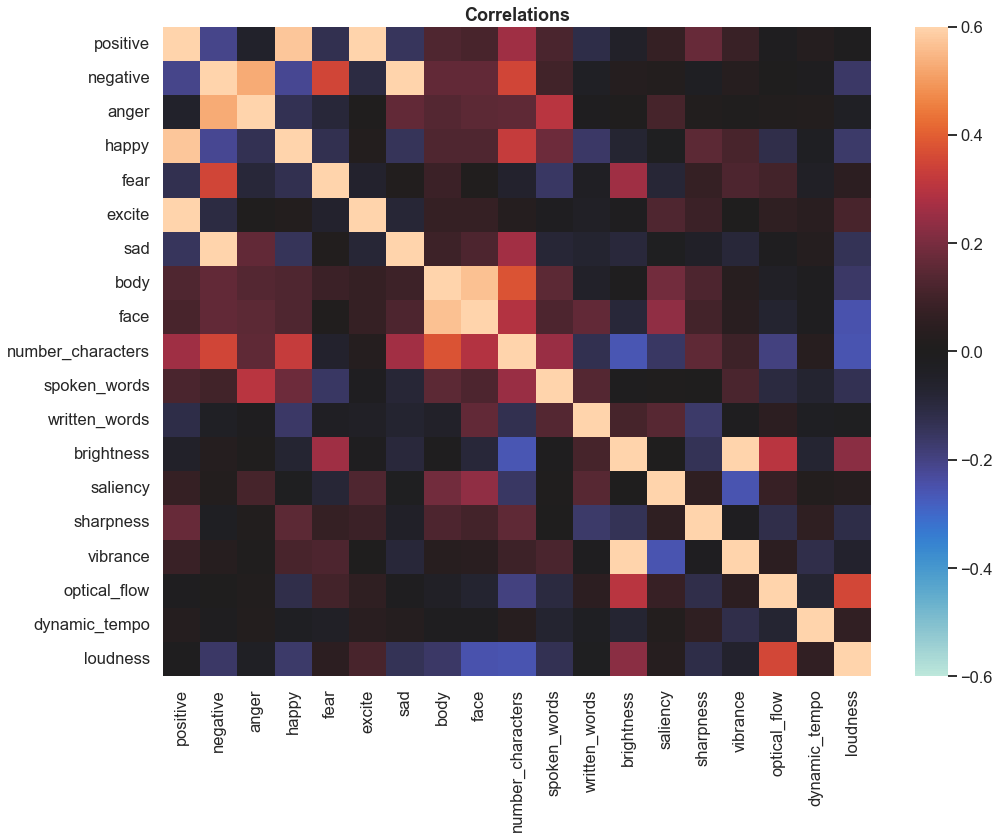

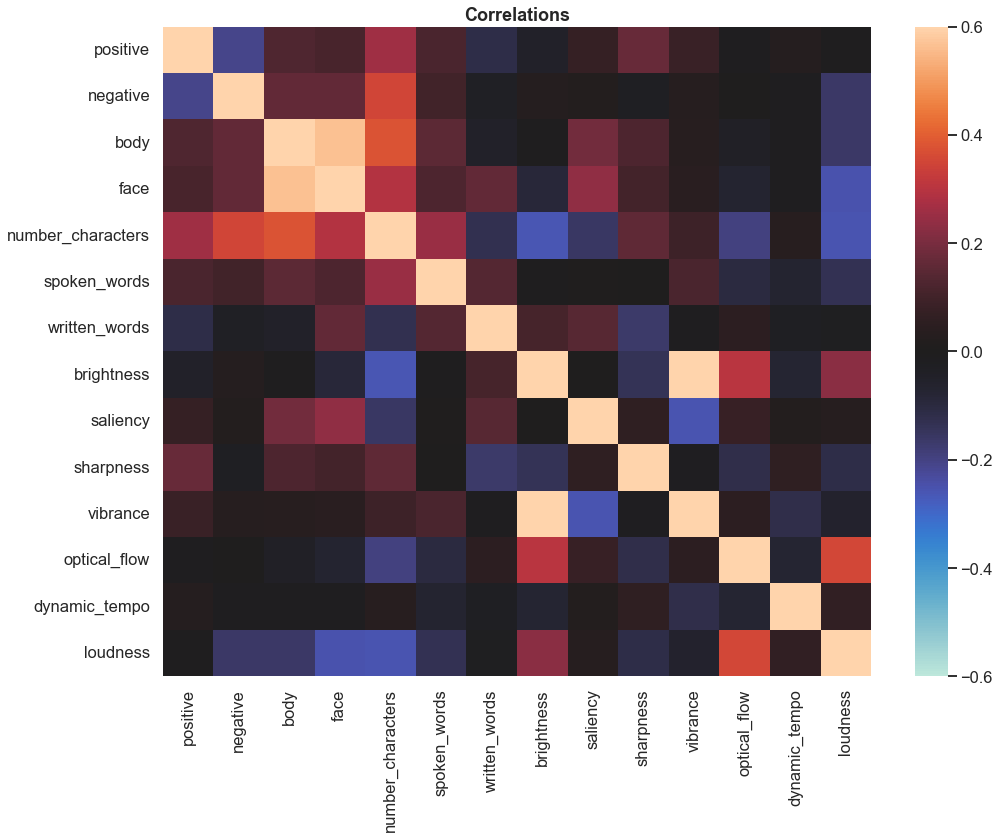

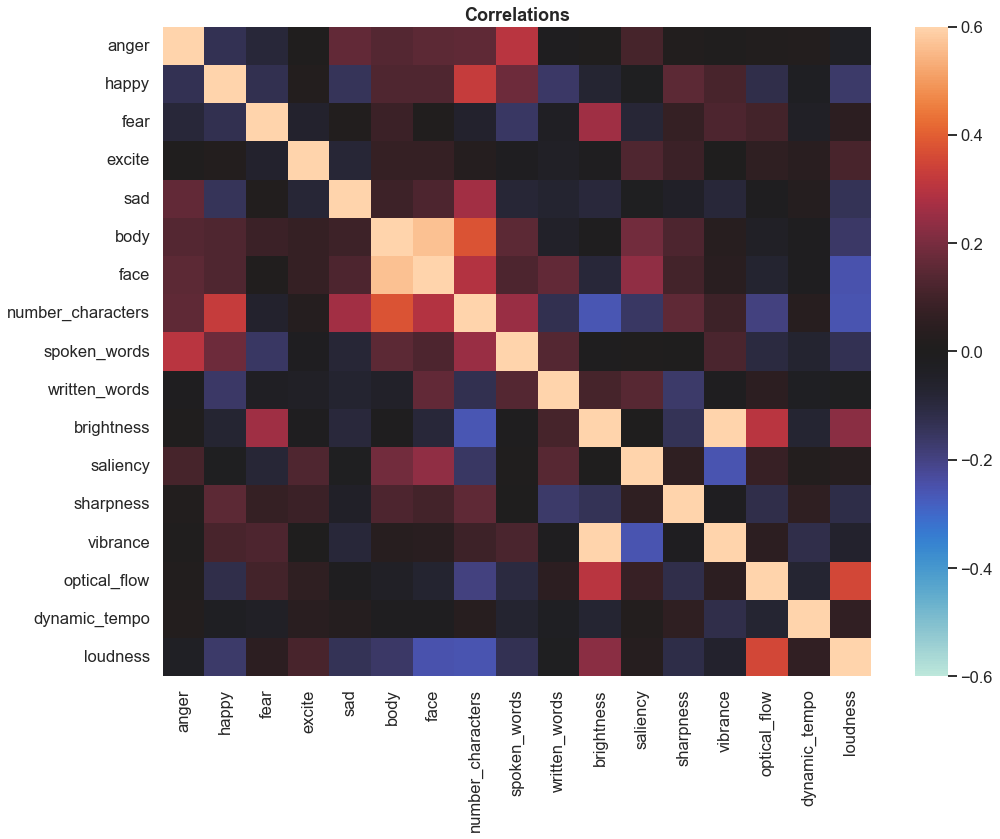

In [30]:
# plot and save the explained variance
corr.to_csv(proc_folder + 'summary/DM_corr.csv')

plt.figure(figsize=(15,12))
sns.heatmap(corr, vmin=-0.6, vmax=0.6, center=0)
plt.title('Correlations', weight='bold')
plt.tight_layout()
plt.savefig(figure_folder + 'DM_corr.svg')
plt.show()
plt.close()

plt.figure(figsize=(15,12))
sns.heatmap(corr.loc[general_features,general_features], vmin=-0.6, vmax=0.6, center=0)
plt.title('Correlations', weight='bold')
plt.tight_layout()
plt.savefig(figure_folder + 'DM_corr_general.svg')
plt.show()
plt.close()

plt.figure(figsize=(15,12))
sns.heatmap(corr.loc[specific_features,specific_features], vmin=-0.6, vmax=0.6, center=0)
plt.title('Correlations', weight='bold')
plt.tight_layout()
plt.savefig(figure_folder + 'DM_corr_specific.svg')
plt.show()
plt.close()

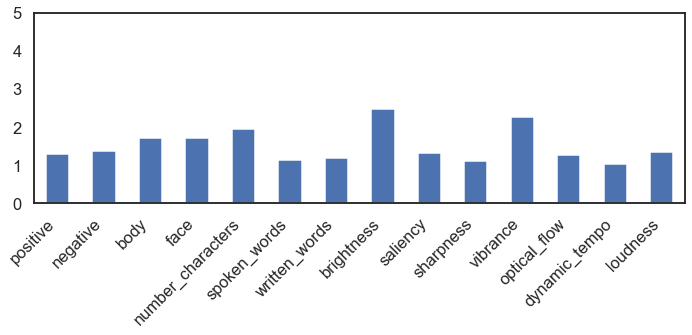

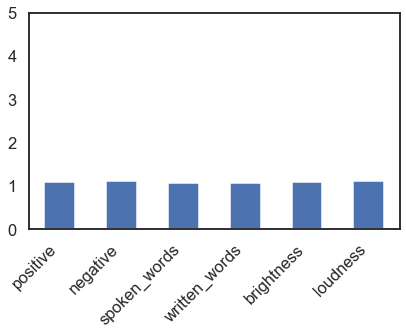

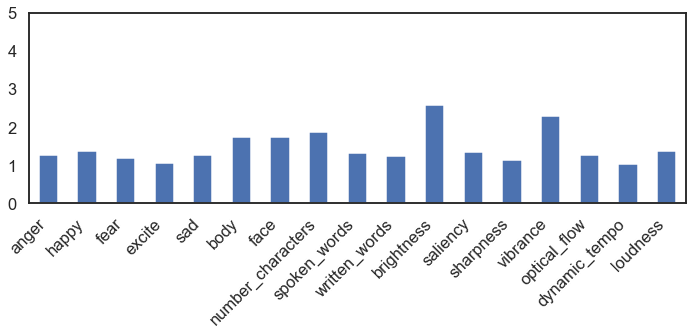

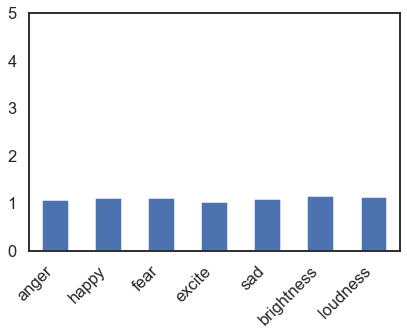

In [26]:
vif_im = variance_inflation_factors(dm_vidfeatstd.loc[:,general_features])
ax = vif_im.plot.bar(figsize=(10,5))
ax.set_xticklabels(vif_im.index, rotation=45, ha='right')
ax.set_ylim((0,5))
plt.tight_layout()
plt.savefig(figure_folder + 'DM_im_vif_general.svg')
plt.show()
plt.close()

vif_im = variance_inflation_factors(dm_vidfeatstd.loc[:,['positive','negative','spoken_words','written_words','brightness','loudness']])
ax = vif_im.plot.bar(figsize=(6,5))
ax.set_xticklabels(vif_im.index, rotation=45, ha='right')
ax.set_ylim((0,5))
plt.tight_layout()
plt.savefig(figure_folder + 'DM_im_vif_general_refined.svg')
plt.show()
plt.close()

vif_im = variance_inflation_factors(dm_vidfeatstd.loc[:,specific_features])
ax = vif_im.plot.bar(figsize=(10,5))
ax.set_xticklabels(vif_im.index, rotation=45, ha='right')
ax.set_ylim((0,5))
plt.tight_layout()
plt.savefig(figure_folder + 'DM_im_vif_specific.svg')
plt.show()
plt.close()

vif_im = variance_inflation_factors(dm_vidfeatstd.loc[:,['anger','happy','fear','excite','sad','brightness','loudness']])
ax = vif_im.plot.bar(figsize=(6,5))
ax.set_xticklabels(vif_im.index, rotation=45, ha='right')
ax.set_ylim((0,5))
plt.tight_layout()
plt.savefig(figure_folder + 'DM_im_vif_specific_refined.svg')
plt.show()
plt.close()

# The Present

### Load and standardize data

In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set(context='talk', style='white')

proc_folder = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/'
analysis_folder = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/analysis/'
figure_folder = analysis_folder + 'figures/'

# list the features of interest for pair-wise comparison
feat_orig = ['char_pos_int', 'char_neg_int', 'char_anger_int','char_happy_int','char_fear_int', 
            'char_excite_int','char_sad_int','has_body', 'has_faces', 'num_chars','speaking', 
            'whole_words','brightness', 'frac_high_saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'rms']

features = ['positive', 'negative', 'anger','happy','fear', 'excite','sad',
            'body', 'face', 'number_characters','spoken_words', 'written_words',
            'brightness', 'saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'loudness']

# load data and rescale each entry
mm = MinMaxScaler(feature_range=(0,1))
tp_vidfeatures = pd.read_csv(proc_folder + 'summary/TP_summary_codes.csv', index_col=0)
tp_vidfeatstd = pd.DataFrame(mm.fit_transform(tp_vidfeatures[feat_orig]), columns=features, index=tp_vidfeatures.index)
tp_vidfeatstd.describe()

,positive,negative,anger,happy,fear,excite,sad,body,face,number_characters,spoken_words,written_words,brightness,saliency,sharpness,vibrance,optical_flow,dynamic_tempo,loudness
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,0.264409,0.074083,0.042663,0.123014,0.012205,0.071828,0.015467,0.889764,0.799213,0.653543,0.212598,0.035433,0.566982,0.511981,0.872642,0.387629,0.101977,0.537926,0.218137
std,0.256808,0.174995,0.120463,0.157274,0.088178,0.197526,0.100323,0.313802,0.401380,0.294963,0.409954,0.185237,0.183120,0.158519,0.189518,0.193396,0.115571,0.148531,0.172979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.514098,0.411833,0.779481,0.225633,0.024167,0.444715,0.100422
50%,0.200000,0.000000,0.000000,0.068182,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.612892,0.532855,1.000000,0.403136,0.070030,0.538223,0.162350
75%,0.400000,0.021341,0.000000,0.181818,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.662567,0.635981,1.000000,0.485534,0.130475,0.624400,0.309159
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
pcentnonzero = pd.DataFrame()
for a in features:
    t = (tp_vidfeatstd[a]>0).astype(int)
    pcentnonzero.loc[a,'percent'] = (sum(t)/len(tp_vidfeatstd))*100
pcentnonzero.to_csv('TPpcents.csv')

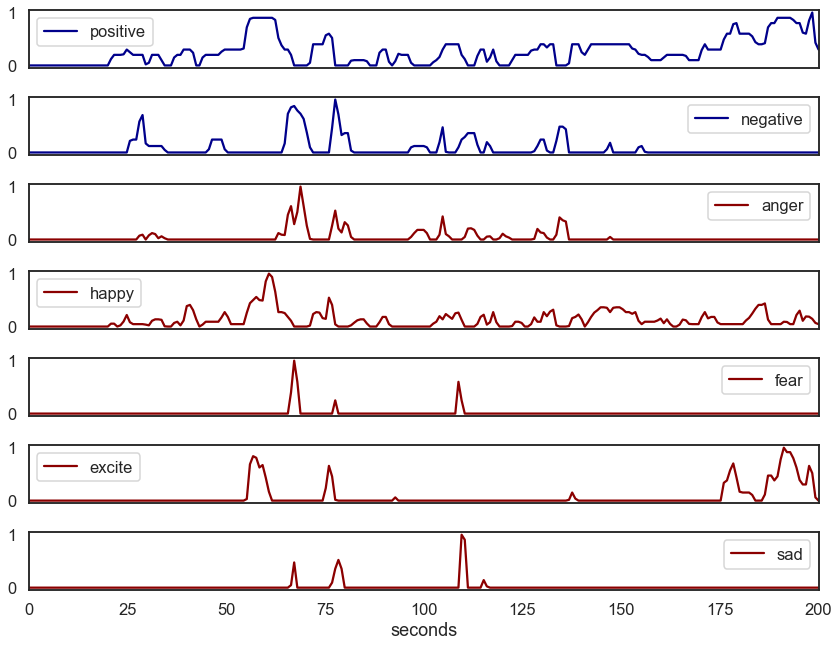

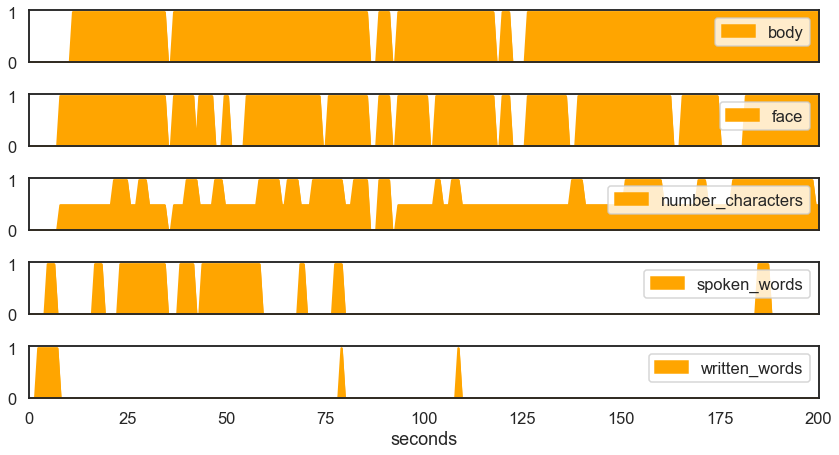

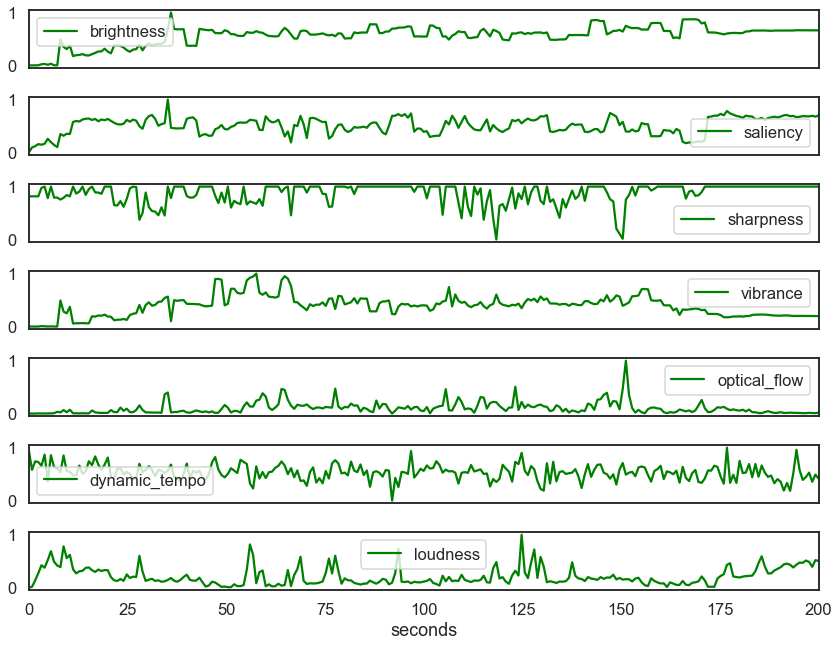

In [31]:
tp_vidfeatstd[['positive', 'negative','anger','happy','fear', 'excite','sad']].plot(kind='line',figsize=(12,8/6*7),subplots=True, xlim=(0,200), 
                                                      color=['darkblue','darkblue','darkred','darkred','darkred','darkred','darkred'])
plt.tight_layout()
plt.savefig(figure_folder + 'TP_valencecodes.svg')
plt.show()
plt.close()
tp_vidfeatstd[['body', 'face', 'number_characters','spoken_words', 'written_words']].plot(kind='area',
                                                      figsize=(12,8/6*5),subplots=True, xlim=(0,200), 
                                                      color='orange')
plt.tight_layout()
plt.savefig(figure_folder + 'TP_objectivecodes.svg')
plt.show()
plt.close()
tp_vidfeatstd[['brightness', 'saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'loudness']].plot(kind='line',
                                                      figsize=(12,8/6*7),subplots=True, xlim=(0,200), 
                                                      color='green')
plt.tight_layout()
plt.savefig(figure_folder + 'TP_automaticcodes.svg')
plt.show()
plt.close()

### Compute Pairwise Mean Instantaneous Phase Synchrony

In [32]:
from scipy.signal import hilbert
import itertools
from sklearn.metrics import explained_variance_score

mean_ips = pd.DataFrame(1, columns=features, index=features)
varexp = pd.DataFrame(1, columns=features, index=features)
corr = pd.DataFrame(1, columns=features, index=features)

# get unique pairs of feature labels
combs = itertools.combinations(features,2)
for pair in combs:
    a = pair[0]
    b = pair[1]
    
    # compute phase angles
    aphase = np.angle(hilbert(tp_vidfeatstd[a]),deg=False)
    bphase = np.angle(hilbert(tp_vidfeatstd[b]),deg=False)
    # compute phase synchrony
    phase_synchrony = 1-np.sin(np.abs(aphase-bphase)/2)
    
    # plot the signals and their phase synchrony
    fig, ax = plt.subplots(3,1,figsize=(12,9))
    plt.setp(ax,xlim=(0,201),xlabel='Time (seconds)')
    ax[0].plot(tp_vidfeatstd.index, tp_vidfeatstd[a], tp_vidfeatstd.index, tp_vidfeatstd[b])
    ax[0].set_title('{0} (blue) and {1} (orange) Signals'.format(a,b), weight='bold')
    ax[1].plot(tp_vidfeatstd.index, aphase, tp_vidfeatstd.index, bphase)
    ax[1].set_title('{0} (blue) and {1} (orange) Phase Angles'.format(a,b), weight='bold')
    ax[2].plot(tp_vidfeatstd.index, phase_synchrony)
    ax[2].set_title('Instantaneous Phase Synchrony', weight='bold')
    plt.tight_layout()
    #plt.savefig(figure_folder + 'TP_{0}_{1}_ips.svg'.format(a,b))
    plt.close()
    
    # add mean IPS to the dataframe
    mean_ips.loc[a, b] = phase_synchrony.mean()
    mean_ips.loc[b, a] = phase_synchrony.mean()
    varexp.loc[a, b] = explained_variance_score(tp_vidfeatstd[a], tp_vidfeatstd[b])
    varexp.loc[b, a] = explained_variance_score(tp_vidfeatstd[b], tp_vidfeatstd[a])
    corr.loc[a, b] = np.corrcoef(tp_vidfeatstd[a], tp_vidfeatstd[b])[1,0]

    corr.loc[b, a] = np.corrcoef(tp_vidfeatstd[a], tp_vidfeatstd[b])[1,0]

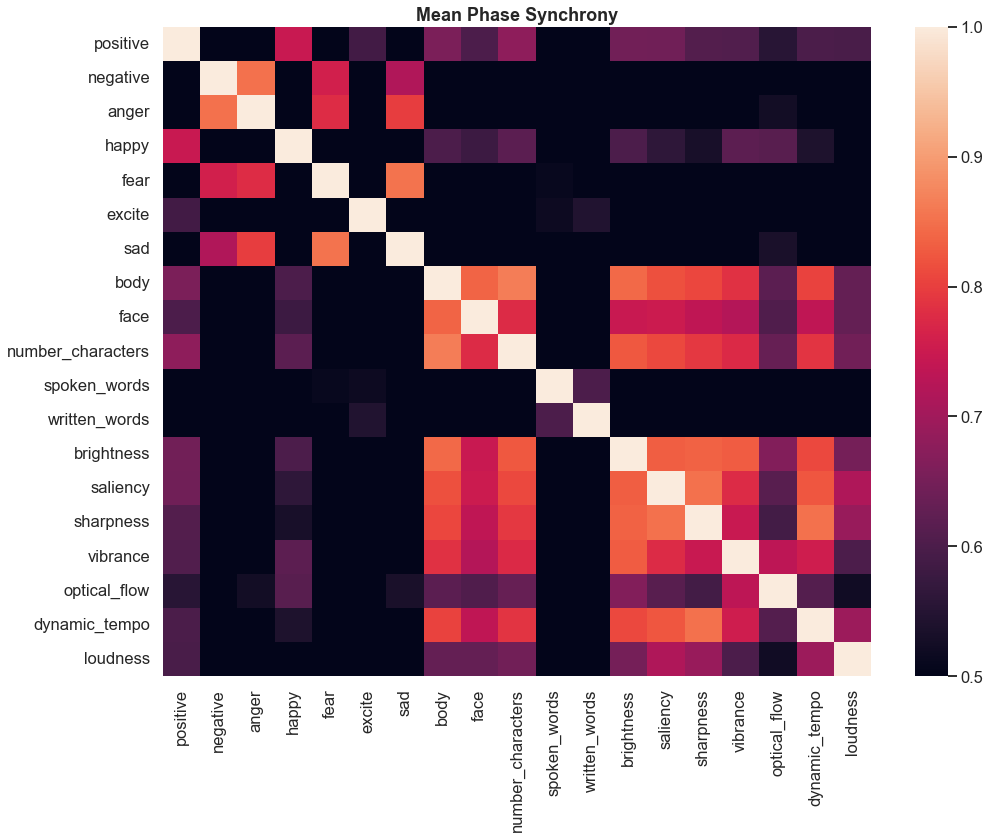

In [35]:
general_features =['positive', 'negative', 'body', 'face', 'number_characters','spoken_words', 'written_words',
            'brightness', 'saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'loudness']

specific_features = ['anger','happy','fear', 'excite','sad',
            'body', 'face', 'number_characters','spoken_words', 'written_words',
            'brightness', 'saliency', 'sharpness', 'vibrance', 'optical_flow', 
            'dynamic_tempo', 'loudness']


# plot and save the mean ISP
mean_ips.to_csv(proc_folder + 'summary/TP_mean_ips.csv')

plt.figure(figsize=(15,12))
sns.heatmap(mean_ips, vmin=0.5)
plt.title('Mean Phase Synchrony', weight='bold')
plt.tight_layout()
plt.savefig(figure_folder + 'TP_mean_ips.svg')
plt.show()

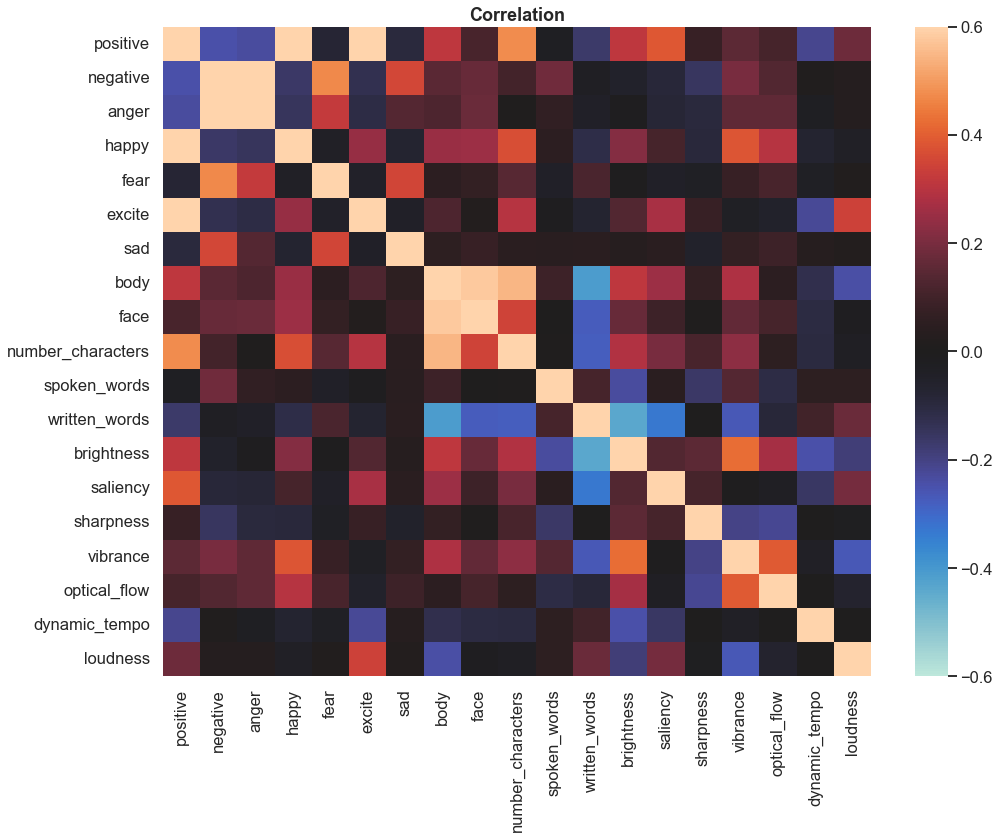

In [34]:
# plot and save the explained variance
corr.to_csv(proc_folder + 'summary/TP_corr.csv')

plt.figure(figsize=(15,12))
sns.heatmap(corr, vmin=-0.6, vmax=0.6, center=0)
plt.title('Correlation', weight='bold')
plt.tight_layout()
plt.savefig(figure_folder + 'TP_corr.svg')
plt.show()
plt.close()

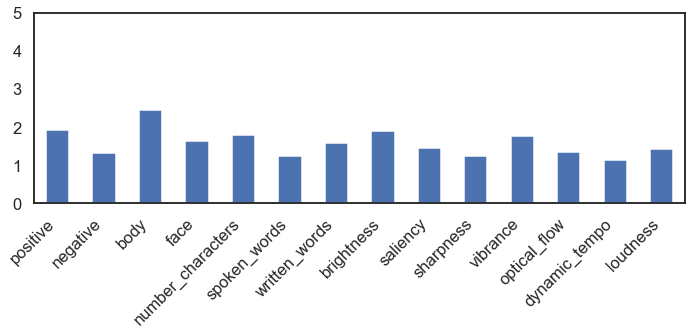

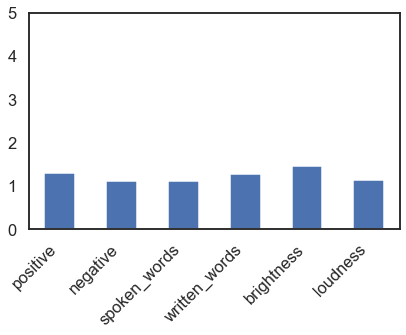

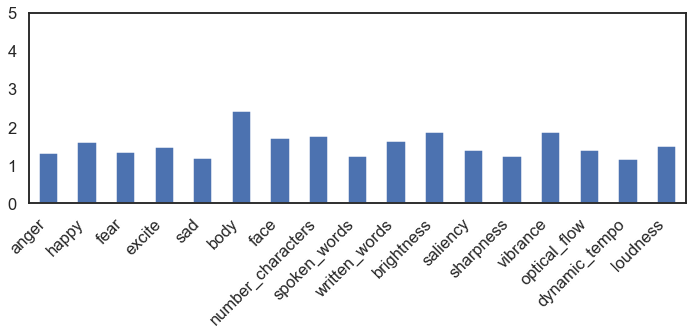

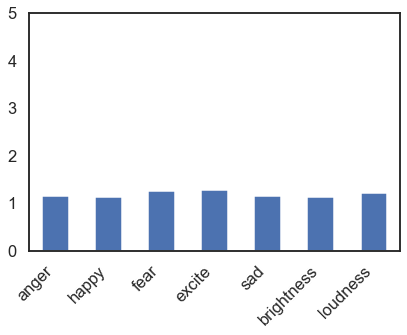

In [38]:
vif_im = variance_inflation_factors(tp_vidfeatstd.loc[:,general_features])
ax = vif_im.plot.bar(figsize=(10,5))
ax.set_xticklabels(vif_im.index, rotation=45, ha='right')
ax.set_ylim((0,5))
plt.tight_layout()
plt.savefig(figure_folder + 'TP_im_vif_general.svg')
plt.show()
plt.close()

vif_im = variance_inflation_factors(tp_vidfeatstd.loc[:,['positive','negative','spoken_words', 'written_words','brightness','loudness']])
ax = vif_im.plot.bar(figsize=(6,5))
ax.set_xticklabels(vif_im.index, rotation=45, ha='right')
ax.set_ylim((0,5))
plt.tight_layout()
plt.savefig(figure_folder + 'TP_im_vif_general_refine.svg')
plt.show()
plt.close()

vif_im = variance_inflation_factors(tp_vidfeatstd.loc[:,specific_features])
ax = vif_im.plot.bar(figsize=(10,5))
ax.set_xticklabels(vif_im.index, rotation=45, ha='right')
ax.set_ylim((0,5))
plt.tight_layout()
plt.savefig(figure_folder + 'TP_im_vif_specific.svg')
plt.show()
plt.close()

vif_im = variance_inflation_factors(tp_vidfeatstd.loc[:,['anger','happy','fear', 'excite','sad','brightness','loudness']])
ax = vif_im.plot.bar(figsize=(6,5))
ax.set_xticklabels(vif_im.index, rotation=45, ha='right')
ax.set_ylim((0,5))
plt.tight_layout()
plt.savefig(figure_folder + 'TP_im_vif_specific_refine.svg')
plt.show()
plt.close()